# Assignment: Basic Web Scrapping and more...

Fill in your name here.

In [1]:
name = 'Ekaterina Dlinnova'
if name == '':
    raise NotImplementedError('Put your name')

You will receive points for:
- implementing the given tasks.
- using good practices such as OOP in some cases, or decorators.
- good code structure on the last task.
- handling edge cases and exceptions.
- comprehensive unit tests (by using any of the libraries seen. I recommend `unittest`).

We will need the following libraries, but of course you can add the libraries you prefer.

In [6]:
for _ in range(2):
    try:
        from bs4 import BeautifulSoup
        import requests
        import unittest
        import networkx as nx
        import urllib
    except ImportError:
        ! pip install beautifulsoup4
        ! pip install requests
        ! pip install unittest2
        ! pip install networkx
    else:
        break

## Task 1

The following function receives a URL, and tries to fetch all the links on it, and returns a list with all those links.

1. Modify the function so that it returns the expected links.

2. Be sure to do unit testing to check that the behaviour of the function is the one we expect.

3. Consider edge cases (for example, what if the given URL is not a valid URL).

In [9]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

def get_all_links(url: str):
    """
    Get all the links in the webpage at the given URL

    :param url: A string that is the URL of the webpage where we need to find the links
    :return: A list with all the links of the given webpage
    """
    try:
        response = requests.get(url, timeout=10)  # Adding a timeout to avoid hanging indefinitely.
        response.raise_for_status()  # Raise an exception for HTTP error responses.
    except (requests.RequestException, Exception) as e:
        print(f"Error fetching {url}: {e}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    urls = []

    for a in soup.find_all('a', href=True):
        link = a['href']
        # Ensure the URL starts with "http" and is valid (not a relative path).
        if link.startswith("http") and urlparse(link).netloc:
            urls.append(link)

    return urls

In [10]:
get_all_links('http://en.wikipedia.com')[:10]

['https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 'https://commons.wikimedia.org/wiki/Main_Page',
 'https://foundation.wikimedia.org/wiki/Home',
 'https://www.mediawiki.org/wiki/MediaWiki',
 'https://meta.wikimedia.org/wiki/Main_Page',
 'https://outreach.wikimedia.org/wiki/Main_Page',
 'https://wikisource.org/wiki/Main_Page',
 'https://species.wikimedia.org/wiki/Main_Page',
 'https://en.wikibooks.org/wiki/Main_Page']

In [30]:
# Unit tests
import unittest
from unittest.mock import patch, Mock
from urllib.parse import urlparse

class TestGetAllLinks(unittest.TestCase):

    @patch('requests.get')
    def test_get_all_links_success(self, mock_get):
        # Mock the response from requests.get
        mock_response = Mock()
        mock_response.status_code = 200
        mock_response.text = """
        <html>
            <body>
                <a href="http://example.com/page1">Link 1</a>
                <a href="http://example.com/page2">Link 2</a>
                <a href="http://example.com/page3">Link 3</a>
            </body>
        </html>
        """
        mock_get.return_value = mock_response

        # Call the function with a test URL
        result = get_all_links("http://example.com")

        # Check that the function returns the correct links
        self.assertEqual(result, [
            "http://example.com/page1",
            "http://example.com/page2",
            "http://example.com/page3"
        ])

    @patch('requests.get')
    def test_get_all_links_no_links(self, mock_get):
        # Mock the response with no <a> tags
        mock_response = Mock()
        mock_response.status_code = 200
        mock_response.text = """
        <html>
            <body>
                <p>No links here</p>
            </body>
        </html>
        """
        mock_get.return_value = mock_response

        # Call the function with a test URL
        result = get_all_links("http://example.com")

        # Ensure that it returns an empty list when there are no links
        self.assertEqual(result, [])

    def test_links_from_wikipedia(self):
        links = get_all_links('http://en.wikipedia.com')
        self.assertGreater(len(links), 1)

    def test_correct_links_from_wikipedia(self):
        links = get_all_links('http://en.wikipedia.com')
        correct_links = ['https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 'https://commons.wikimedia.org/wiki/Main_Page',
 'https://foundation.wikimedia.org/wiki/Home',
 'https://www.mediawiki.org/wiki/MediaWiki',
 'https://meta.wikimedia.org/wiki/Main_Page',
 'https://outreach.wikimedia.org/wiki/Main_Page',
 'https://wikisource.org/wiki/Main_Page',
 'https://species.wikimedia.org/wiki/Main_Page',
 'https://en.wikibooks.org/wiki/Main_Page']
        self.assertEqual(links[:10], correct_links)

    def test_wrong_url(self):
        links = get_all_links('https://qwertyyy.com/')
        self.assertEqual(links, [])

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

suite_depth = unittest.TestLoader().loadTestsFromTestCase(TestGetAllLinks)
unittest.TextTestRunner(verbosity=2).run(suite_depth)

test_correct_links_from_wikipedia (__main__.TestGetAllLinks.test_correct_links_from_wikipedia) ... ok
test_get_all_links_no_links (__main__.TestGetAllLinks.test_get_all_links_no_links) ... ok
test_get_all_links_success (__main__.TestGetAllLinks.test_get_all_links_success) ... ok
test_links_from_wikipedia (__main__.TestGetAllLinks.test_links_from_wikipedia) ... ok
test_wrong_url (__main__.TestGetAllLinks.test_wrong_url) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.804s

OK
test_correct_links_from_wikipedia (__main__.TestGetAllLinks.test_correct_links_from_wikipedia) ... ok
test_get_all_links_no_links (__main__.TestGetAllLinks.test_get_all_links_no_links) ... ok
test_get_all_links_success (__main__.TestGetAllLinks.test_get_all_links_success) ... ok
test_links_from_wikipedia (__main__.TestGetAllLinks.test_links_from_wikipedia) ... ok
test_wrong_url (__main__.TestGetAllLinks.test_wrong_url) ... ok

-----------------------------------------

<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Task 2

Create a generator (`get_neighbor_pages`) that receives a URL, but instead of returning a list with all the links in that page, it should go to those links, and  **yield** their html content.

Remember to add unit tests.

In [31]:
def get_neighbor_pages(url: str):
    """
    Go through the links in the webpage at the given URL
    and yield the html content of each of them

    :param url: A string that is the URL of the webpage
    """
    retries = 3
    timeout = 10
    links = get_all_links(url)
    for link in links:
        attempts = 0
        while attempts < retries:
            try:
                response = requests.get(link, timeout=timeout)
                if response.ok:
                    yield response.text
                    break  # Exit retry loop if the request is successful
            except requests.RequestException as e:
                print(f"Error fetching {link}: {e}")
                attempts += 1
                if attempts >= retries:
                    print(f"Giving up on {link} after {retries} retries.")
                    break

In [52]:
import unittest
from unittest.mock import patch, MagicMock
import requests


class TestGetNeighborPages(unittest.TestCase):
    def setUp(self):
        # Setup URLs and sample HTML content for testing
        self.valid_url = "https://example.com"
        self.invalid_url = "not_a_url"
        self.sample_html_one_link = """
        <html>
            <body>
                <a href="https://example.com/page1">Link 1</a>
            </body>
        </html>
        """
        self.sample_html = """
        <html>
            <body>
                <a href="https://example.com/page1">Link 1</a>
                <a href="https://example.com/page2">Link 2</a>
            </body>
        </html>
        """
        self.page1_content = "<html>Page 1</html>"
        self.page2_content = "<html>Page 2</html>"

    @patch('requests.get')  # Mock requests.get for testing
    def test_valid_url_with_links(self, mock_get):
        """
        Test for a valid URL with links that return expected HTML content.
        """
        # Mock the responses for the URLs
        mock_responses = [
            MagicMock(text=self.sample_html),
            MagicMock(text=self.page1_content),
            MagicMock(text=self.page2_content)
        ]
        mock_get.side_effect = mock_responses

        # Call the generator
        generator = get_neighbor_pages(self.valid_url)

        # Collect the results
        pages = list(generator)

        # Assert that two pages were returned
        self.assertEqual(len(pages), 2)
        self.assertEqual(pages[0], self.page1_content)
        self.assertEqual(pages[1], self.page2_content)


    @patch('requests.get')  # Mock requests.get for testing
    def test_valid_url_with_link(self, mock_get):
        """
        Test for a valid URL with links that return expected HTML content.
        """
        # Mock the responses for the URLs
        mock_responses = [
            MagicMock(text=self.sample_html_one_link),
            MagicMock(text=self.page1_content),

        ]
        mock_get.side_effect = mock_responses

        # Call the generator
        generator = get_neighbor_pages(self.valid_url)

        # Collect the results
        pages = list(generator)

        # Assert that two pages were returned
        self.assertEqual(len(pages), 1)
        self.assertEqual(pages[0], self.page1_content)

    def test_invalid_url(self):
        """
        Test for an invalid URL, empty list is returned
        """
        res = list(get_neighbor_pages(self.invalid_url))
        self.assertEqual(res, [])



    @patch('requests.get')  # Mock requests.get for testing network error
    def test_network_error(self, mock_get):
        """
        Test handling of network errors.
        """
        mock_get.side_effect = requests.RequestException("Network error")

        # Ensure that a RequestException is raised when network fails
        res = list(get_neighbor_pages(self.valid_url))
        self.assertEqual(res, [])


    @patch('requests.get')  # Mock requests.get to return an empty page
    def test_empty_page(self, mock_get):
        """
        Test for pages without any links.
        """
        # Mock a response with no links
        mock_get.return_value = MagicMock(text="<html><body>No links here</body></html>")

        # Call the generator
        generator = get_neighbor_pages(self.valid_url)
        pages = list(generator)

        # Assert that no pages were returned
        self.assertEqual(len(pages), 0)

suite_depth = unittest.TestLoader().loadTestsFromTestCase(TestGetNeighborPages)
unittest.TextTestRunner(verbosity=2).run(suite_depth)


test_empty_page (__main__.TestGetNeighborPages.test_empty_page)
Test for pages without any links. ... ok
test_invalid_url (__main__.TestGetNeighborPages.test_invalid_url)
Test for an invalid URL, empty list is returned ... ok
test_network_error (__main__.TestGetNeighborPages.test_network_error)
Test handling of network errors. ... ok
test_valid_url_with_link (__main__.TestGetNeighborPages.test_valid_url_with_link)
Test for a valid URL with links that return expected HTML content. ... ok
test_valid_url_with_links (__main__.TestGetNeighborPages.test_valid_url_with_links)
Test for a valid URL with links that return expected HTML content. ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.035s

OK


Error fetching not_a_url: Invalid URL 'not_a_url': No scheme supplied. Perhaps you meant https://not_a_url?
Error fetching https://example.com: Network error


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Task 3

Create a function (`get_pages_depth()`) that receives a URL and a number `depth`, that will go through all the links the given URL, as deep as the given depth.

For example, let's say the current page `page_1` has a link to a page `page_2` and a link to a page `page_3`, and the page `page_2` has a link to a page `page_4`,  and `page_4` has a link to a page `page_5`, and `page_3` has a link to a page `page_6`, and `page_6` has a link to a page `page_7`.

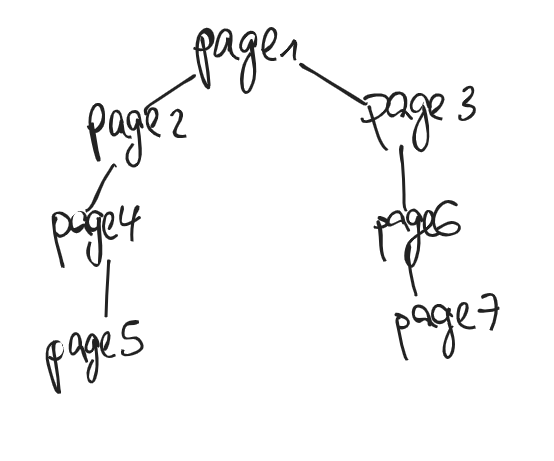

Then, if we call `get_pages_depth()` at `page_1` with `depth = 2`, then it should retrieve the pages `page_1`, `page_2`, `page_4`, `page_3` and `page_6`. We won't care about the order in which these pages are retrieved.

- Implement the function as a generator.

- Remember that a page might contain a link to a parent page, so try to take that into account.

- Consider any other edge cases that might happen, such as two pages leading to the same page. In that case, that page should only be retrieved once.

- Maybe you can add a decorator to handle such cases?

In [53]:
import requests
from typing import Generator, Set
from functools import wraps

def handle_duplicates(func):
    """
    Decorator to handle duplicate URLs and avoid revisiting the same page.
    """
    @wraps(func)
    def wrapper(url: str, depth: int, visited: Set[str] = None) -> Generator[str, None, None]:
        if visited is None:
            visited = set()
        return func(url, depth, visited)
    return wrapper

@handle_duplicates
def get_pages_depth(url: str, depth: int, visited: Set[str]) -> Generator[str, None, None]:
    """
    Recursively retrieve pages starting from the given URL up to the specified depth.

    :param url: The starting URL.
    :param depth: The maximum depth to traverse.
    :param visited: A set of visited URLs to avoid duplicates.
    :yield: The HTML content of each page.
    """
    if depth < 0 or url in visited:
        return

    visited.add(url)

    try:
        response = requests.get(url, timeout=10)
        if response.ok:
            yield response.text

            if depth > 0:
                # Get all links on the current page
                links = get_all_links(url)
                for link in links:
                    yield from get_pages_depth(link, depth - 1, visited)
    except requests.RequestException as e:
        print(f"Error fetching {url}: {e}")

In [54]:
pages = get_pages_depth(depth = 2, url = 'http://en.wikipedia.org')

In [55]:
next(pages)

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Wikipedia, the free encyclopedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-di

In [69]:
class TestGetPageDepth(unittest.TestCase):
    def setUp(self):
        self.url = 'https://en.wikipedia.org/wiki/Main_Page'

    def test_no_exception(self):
        pages = get_pages_depth(depth=0, url='https://example.com/')
        next(pages)

    def test_deepness(self):
        pages = get_pages_depth(depth=1, url='https://example.com/')
        i = 0
        for _ in pages:
            i += 1
        self.assertEqual(i, 2)

    def test_wrong_url(self):
        pages = get_pages_depth(depth=2, url='https://sldfjasdf.com/')
        with self.assertRaises(StopIteration):
            next(pages)

suite_depth = unittest.TestLoader().loadTestsFromTestCase(TestGetPageDepth)
unittest.TextTestRunner(verbosity=2).run(suite_depth)

test_deepness (__main__.TestGetPageDepth.test_deepness) ... ok
test_no_exception (__main__.TestGetPageDepth.test_no_exception) ... ok
test_wrong_url (__main__.TestGetPageDepth.test_wrong_url) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.894s

OK


Error fetching https://sldfjasdf.com/: HTTPSConnectionPool(host='sldfjasdf.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e04dc562390>: Failed to resolve 'sldfjasdf.com' ([Errno -2] Name or service not known)"))


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Task 4

Create a class `ComputerScientist` that will contain information such as `name`, `birthdate`, `major_achievements`, `alma_mater`, etc.

- Implement the methods you consider appropriate.

- Make unit tests to make sure the methods work alright.

Write a script to go to this [list of computer scientists](https://en.wikipedia.org/wiki/List_of_computer_scientists) and fetch information about 100 random scientists from this list, and create a python `list` containing `ComputerScientist()` objects with the information retrieved from the given link.

In [101]:
from dataclasses import dataclass, field
from typing import List, Optional, Dict
import re
import random
import logging
import requests
from bs4 import BeautifulSoup, Tag
from urllib.parse import urljoin

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

WIKI_BASE_URL = "https://en.wikipedia.org"
LIST_URL = urljoin(WIKI_BASE_URL, "/wiki/List_of_computer_scientists")
MAX_FIELDS_OF_EXPERTISE = 5
REQUEST_TIMEOUT = 10
USER_AGENT = "Mozilla/5.0 (compatible; CSResearcherBot/1.0; +http://example.com/bot)"

@dataclass
class ComputerScientist:
    name: str
    birthdate: Optional[str] = None
    major_achievements: List[str] = field(default_factory=list)
    alma_mater: List[str] = field(default_factory=list)
    fields_of_expertise: List[str] = field(default_factory=list)
    wikipedia_url: Optional[str] = None

    def add_achievement(self, achievement: str) -> None:
        """Add a validated achievement to the list if not already present"""
        if achievement and achievement not in self.major_achievements:
            self.major_achievements.append(achievement.strip())
            logger.debug("Added achievement for %s: %s", self.name, achievement)

    def add_alma_mater(self, institution: str) -> None:
        """Add a validated alma mater institution if not already present"""
        if institution and institution not in self.alma_mater:
            self.alma_mater.append(institution.strip())
            logger.debug("Added alma mater for %s: %s", self.name, institution)

    def add_field_of_expertise(self, field: str) -> None:
        """Add a validated field of expertise if not already present"""
        if field and field not in self.fields_of_expertise:
            self.fields_of_expertise.append(field.strip())
            logger.debug("Added expertise for %s: %s", self.name, field)

    def validate(self) -> bool:
        """Basic data validation check"""
        return all([
            self.name.strip(),
            len(self.name) < 100,
            len(self.fields_of_expertise) <= MAX_FIELDS_OF_EXPERTISE
        ])

    def __str__(self) -> str:
        return f"{self.name} ({self.birthdate or 'unknown birthdate'})"

    def __repr__(self) -> str:
        return (
            f"ComputerScientist(name={self.name!r}, "
            f"birthdate={self.birthdate!r}, "
            f"expertise={self.fields_of_expertise!r})"
        )

class WikipediaParser:
    def __init__(self):
        self.session = requests.Session()
        self.session.headers.update({'User-Agent': USER_AGENT})

    def fetch_page(self, url: str) -> Optional[BeautifulSoup]:
        """Fetch and parse a Wikipedia page with error handling"""
        try:
            response = self.session.get(url, timeout=REQUEST_TIMEOUT)
            response.raise_for_status()
            return BeautifulSoup(response.text, 'html.parser')
        except requests.RequestException as e:
            logger.error("Failed to fetch %s: %s", url, str(e))
            return None

    def parse_scientists_list(self, soup: BeautifulSoup) -> List[Dict[str, str]]:
        """Parse the main list of computer scientists"""
        scientists = []

        for heading in soup.select('.mw-heading2'):
            if ul := heading.find_next_sibling('ul'):
                for li in ul.find_all('li', recursive=False):
                    if a_tag := li.find('a', href=True):
                        scientists.append({
                            'name': a_tag.get_text().strip(),
                            'link': urljoin(WIKI_BASE_URL, a_tag['href'])
                        })

        logger.info("Parsed %d scientists from list", len(scientists))
        return scientists

    def parse_individual_page(self, soup: BeautifulSoup) -> Dict:
        """Parse individual scientist's Wikipedia page"""
        def safe_extract(element: Tag, selector: str) -> Optional[str]:
            if found := element.select_one(selector):
                return found.get_text(separator=' ', strip=True)
            return None

        data = {
            'birthdate': None,
            'alma_mater': [],
            'expertise': [],
            'achievements': []
        }

        # Extract from infobox
        if infobox := soup.find('table', class_='infobox'):
            data['birthdate'] = safe_extract(infobox, 'th:-soup-contains("Born") + td')

            if alma_section := infobox.select_one('th:-soup-contains("Alma mater") + td'):
                data['alma_mater'] = [
                    inst.get_text(strip=True)
                    for inst in alma_section.find_all(['a', 'li'])
                ]

        # Extract expertise from first paragraph
        if first_para := soup.select_one('.mw-parser-output > p'):
            expertise = re.split(r', | and |;', first_para.get_text(strip=True))
            data['expertise'] = [f.strip() for f in expertise if f.strip()][:MAX_FIELDS_OF_EXPERTISE]

        # Extract achievements
        for header in soup.select('h2, h3'):
            if 'known for' in header.get_text().lower():
                if achievements_list := header.find_next_sibling('ul'):
                    data['achievements'] = [
                        li.get_text(strip=True)
                        for li in achievements_list.find_all('li')
                    ]
                break

        return data

class ScientistFetcher:
    def __init__(self):
        self.parser = WikipediaParser()

    def fetch_computer_scientists(self, count: int = 100) -> List[ComputerScientist]:
        """Main function to fetch and process computer scientists data"""
        if not (soup := self.parser.fetch_page(LIST_URL)):
            return []

        scientists_list = self.parser.parse_scientists_list(soup)

        # Validate and select scientists
        selected = random.sample(scientists_list, min(count, len(scientists_list)))
        results = []

        for scientist in selected:
            if not (page_soup := self.parser.fetch_page(scientist['link'])):
                continue

            parsed_data = self.parser.parse_individual_page(page_soup)

            cs = ComputerScientist(
                name=scientist['name'],
                wikipedia_url=scientist['link'],
                birthdate=parsed_data.get('birthdate'),
                alma_mater=parsed_data.get('alma_mater', []),
                fields_of_expertise=parsed_data.get('expertise', [])
            )

            for achievement in parsed_data.get('achievements', []):
                cs.add_achievement(achievement)

            if cs.validate():
                results.append(cs)
                logger.info("Successfully processed %s", cs.name)
            else:
                logger.warning("Validation failed for %s", scientist['name'])

        logger.info("Completed processing. Retrieved %d valid scientists", len(results))
        return results



In [102]:
fetcher = ScientistFetcher()
scientists = fetcher.fetch_computer_scientists(100)
for scientist in scientists[:5]:
    print(scientist)

Leonid Levin (Leonid Anatolievich Levin ( 1948-11-02 ) November 2, 1948 (age 76) Dnipropetrovsk , Ukrainian SSR , Soviet Union)
Computer scientists with h-index >= 40 (unknown birthdate)
Ryan Dahl (1981 (age 43–44) San Diego , California, U.S)
Ramesh Jain (( 1949-06-08 ) 8 June 1949 (age 75) Nagpur , India)
Seymour Cray (Seymour Roger Cray ( 1925-09-28 ) September 28, 1925 Chippewa Falls, Wisconsin , US)


In [115]:
import unittest
from unittest.mock import patch
from dataclasses import FrozenInstanceError

MAX_FIELDS_OF_EXPERTISE = 3
class TestComputerScientist(unittest.TestCase):
    def setUp(self):
        self.base_scientist = ComputerScientist(name="Alan Turing")
        self.full_scientist = ComputerScientist(
            name="Ada Lovelace",
            birthdate="1815-12-10",
            major_achievements=["First programmer"],
            alma_mater=["University of London"],
            fields_of_expertise=["Mathematics", "Computing"],
            wikipedia_url="https://en.wikipedia.org/wiki/Ada_Lovelace"
        )

    def test_initialization(self):
        self.assertEqual(self.base_scientist.name, "Alan Turing")
        self.assertIsNone(self.base_scientist.birthdate)
        self.assertEqual(self.base_scientist.major_achievements, [])
        self.assertEqual(self.base_scientist.alma_mater, [])
        self.assertEqual(self.base_scientist.fields_of_expertise, [])
        self.assertIsNone(self.base_scientist.wikipedia_url)


        self.assertEqual(self.full_scientist.name, "Ada Lovelace")
        self.assertEqual(self.full_scientist.birthdate, "1815-12-10")
        self.assertEqual(self.full_scientist.major_achievements, ["First programmer"])
        self.assertEqual(self.full_scientist.alma_mater, ["University of London"])
        self.assertEqual(self.full_scientist.fields_of_expertise, ["Mathematics", "Computing"])


    def test_achievement_management(self):
        self.base_scientist.add_achievement(" Turing Machine ")
        self.assertIn("Turing Machine", self.base_scientist.major_achievements)

        self.base_scientist.add_achievement("   ")
        self.assertEqual(len(self.base_scientist.major_achievements), 2)

        self.base_scientist.add_achievement("Turing Machine")
        self.assertEqual(len(self.base_scientist.major_achievements), 2)

    def test_field_limits_and_validation(self):
        for i in range(MAX_FIELDS_OF_EXPERTISE):
            self.base_scientist.add_field_of_expertise(f"Field {i+1}")
        self.assertTrue(self.base_scientist.validate())

        self.base_scientist.add_field_of_expertise("Extra Field")
        self.assertFalse(self.base_scientist.validate())

    def test_string_representations(self):

        self.assertEqual(str(self.base_scientist), "Alan Turing (unknown birthdate)")
        self.assertEqual(str(self.full_scientist), "Ada Lovelace (1815-12-10)")

        full_repr = repr(self.full_scientist)
        self.assertIn("name='Ada Lovelace'", full_repr)
        self.assertIn("birthdate='1815-12-10'", full_repr)
        self.assertIn("expertise=['Mathematics', 'Computing']", full_repr)

    def test_edge_cases(self):

        empty_name = ComputerScientist(name="  ")
        self.assertFalse(empty_name.validate())


        long_name = ComputerScientist(name="X" * 101)
        self.assertFalse(long_name.validate())



suite_depth = unittest.TestLoader().loadTestsFromTestCase(TestComputerScientist)
unittest.TextTestRunner(verbosity=2).run(suite_depth)

test_achievement_management (__main__.TestComputerScientist.test_achievement_management) ... ok
test_edge_cases (__main__.TestComputerScientist.test_edge_cases) ... ok
test_field_limits_and_validation (__main__.TestComputerScientist.test_field_limits_and_validation) ... ok
test_initialization (__main__.TestComputerScientist.test_initialization) ... ok
test_string_representations (__main__.TestComputerScientist.test_string_representations) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.021s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

# Task 5

Use the previously defined `ComputerScientist` class.

Add a new attribute `wikipedia_link` without modifying the definition of the original class. Consider using `setattr()`.

Write a function `fetch_scientist()` that will receive the name of a scientist, and will go to wikipedia and fetch the required scientist, and return a `ComputerScientist` object.

- Remember checking edge cases, such as the scientist not existing.

Add a decorator to cache the request, (i.e: store the answers, and if the scientist was already found before, to not execute the search again).

In [137]:
import requests
from functools import lru_cache
from bs4 import BeautifulSoup
from typing import Optional

WIKI_API_URL = "https://en.wikipedia.org/w/api.php"
USER_AGENT = "CSResearcherBot/1.0 (https://example.com; contact@example.com)"
REQUEST_TIMEOUT = 10

def add_wikipedia_link(obj: ComputerScientist, link: str):
    """Dynamically added attribute wikipedia_link to object"""
    if not hasattr(obj, 'wikipedia_link'):
        setattr(obj, 'wikipedia_link', link)
    return obj

@lru_cache(maxsize=100)
def fetch_scientist2(name: str) -> Optional[ComputerScientist]:
    if not name.strip():
        return None

    try:

        params = {
            'action': 'query',
            'list': 'search',
            'srsearch': name,
            'format': 'json'
        }

        response = requests.get(
            WIKI_API_URL,
            params=params,
            headers={'User-Agent': USER_AGENT},
            timeout=REQUEST_TIMEOUT
        )
        response.raise_for_status()

        data = response.json()
        if response.status_code == 404:
            logger.warning(f"Wikipedia page for '{name}' not found (404).")
            return None
        if not data['query']['search']:
            return None

        # Получение полного URL
        page_title = data['query']['search'][0]['title']
        page_url = f"https://en.wikipedia.org/wiki/{page_title.replace(' ', '_')}"

        # Получение содержимого страницы
        page_response = requests.get(page_url, timeout=REQUEST_TIMEOUT)
        page_response.raise_for_status()

        soup = BeautifulSoup(page_response.text, 'html.parser')

        # Создание объекта и добавление данных
        cs = ComputerScientist(name=name)
        cs = add_wikipedia_link(cs, page_url)

        # Извлечение данных из инфобокса
        infobox = soup.find('table', class_='infobox')
        if infobox:
            # Дата рождения
            born_row = infobox.find('th', string='Born')
            if born_row:
                birthdate = born_row.find_next_sibling('td').get_text(separator=' ', strip=True)
                cs.birthdate = birthdate.split('(')[0].strip()

            # Альма-матер
            alma_row = infobox.find('th', string='Alma mater')
            if alma_row:
                institutions = [a.get_text(strip=True) for a in alma_row.find_next_sibling('td').find_all('a')]
                cs.alma_mater.extend(institutions)

        return cs

    except (requests.RequestException, KeyError, AttributeError) as e:
        print(f"Error fetching data for {name}: {str(e)}")
        return None

scientist = fetch_scientist2("Alan Turing")
if scientist:
    print(f"Found: {scientist.name}")
    print(f"Wikipedia Link: {scientist.wikipedia_link}")
    print(f"Birthdate: {scientist.birthdate}")
    print(f"Alma Mater: {scientist.alma_mater}")
else:
    print("Scientist not found")

Found: Alan Turing
Wikipedia Link: https://en.wikipedia.org/wiki/Alan_Turing
Birthdate: Alan Mathison Turing
Alma Mater: []


In [138]:
import unittest
from unittest.mock import patch, Mock

class TestFetchScientist(unittest.TestCase):
    @patch('requests.get')
    def test_fetch_existing_scientist(self, mock_get):
        mock_response = Mock()
        mock_response.status_code = 200
        mock_response.text = """
        <html>
            <head><title>Alan Turing - Wikipedia</title></head>
            <body>
                <table class="infobox">
                    <tr><th>Born</th><td>June 23, 1912</td></tr>
                    <tr><th>Alma mater</th><td><a href="/wiki/Cambridge_University">Cambridge University</a></td></tr>
                </table>
                <p>Alan Turing was a British mathematician, logician, and cryptanalyst.</p>
                <h2>Known for</h2>
                <ul>
                    <li>Turing machine</li>
                    <li>Breaking the Enigma code</li>
                </ul>
            </body>
        </html>
        """
        mock_get.return_value = mock_response

        cs = fetch_scientist2("Alan Turing")
        self.assertIsNotNone(cs)
        self.assertEqual(cs.name, "Alan Turing")
        self.assertEqual(getattr(cs, 'wikipedia_link', None), "https://en.wikipedia.org/wiki/Alan_Turing")

    @patch('requests.get')
    def test_fetch_non_existing_scientist(self, mock_get):
        mock_response = Mock()
        mock_response.status_code = 404
        mock_get.return_value = mock_response

        cs = fetch_scientist2("qwerty")
        self.assertIsNone(cs)

suite_depth = unittest.TestLoader().loadTestsFromTestCase(TestFetchScientist)
unittest.TextTestRunner(verbosity=2).run(suite_depth)

test_fetch_existing_scientist (__main__.TestFetchScientist.test_fetch_existing_scientist) ... ok
test_fetch_non_existing_scientist (__main__.TestFetchScientist.test_fetch_non_existing_scientist) ... WARNING:__main__:Wikipedia page for 'qwerty' not found (404).
ok

----------------------------------------------------------------------
Ran 2 tests in 0.015s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

# Task 6**

Consider the directed graph where the nodes represent the wikipedia pages of the scientists and the edges represent whether a scientist's page contains a link to the page of another scientist.

Implement a class named `ScientistGraph`, with some attributes and methods like:
- `scientist_list : list[ComputerScientist]`: the list of all scientists
- `graph`: the graph of scientists connected to other scientists (you can use the graph object from `network`, or implement your own way of storing the graph, for e.g: with an adjacency list or an adjacency matrix).
- `add_scientist(scientist_name: str)`: method that will receive the name of the scientist, fetch the corresponding wikipedia page, create the corresponding `ComputerScientist` object, and will add the new edges involving that scientist to the graph. Consider edge cases like the name being incorrect or the scientist being already stored.
- `remove_scientist(scientist_name: str)`: method that will receive the name of a scientist, remove them from the list and removing its node and the edges involving it from the graph. Consider edge cases like the name being incorrect or the scientist not being stored.
- `plot()`: method that will visualize the graph. Show how the graph changes when adding someone new or deleting someone. Bonus: perhaps you want to implement it in a dynamic way, so each time that a scientist is removed from or added to the graph, the visualization changes.
- `rank_scientists():` method that will rank scientists. For this method you can be as creative as you wish: You can start by designing a ranking based on the number of neighbours of each scientists, or the number of times a scientist is mentioned in one of the articles, or by using the famous `PageRank (you need to google it)`, etc., or by any other methods you might like to consider.

Show the usage of these methods in a proper way.
Feel free to add more functionalities.

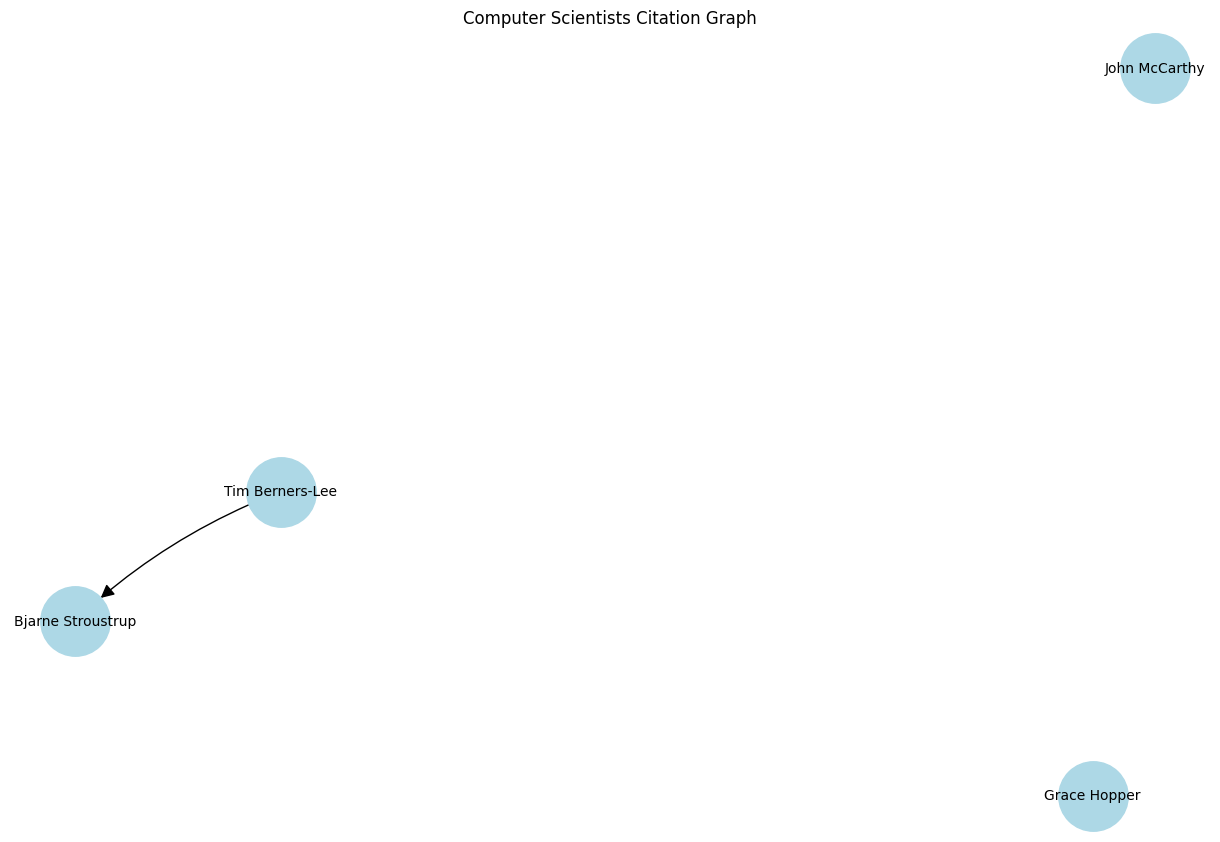

Initial rankings: [('Bjarne Stroustrup', 0.649122638064138), ('Tim Berners-Lee', 0.3508773619358619)]

After adding Donald Knuth:


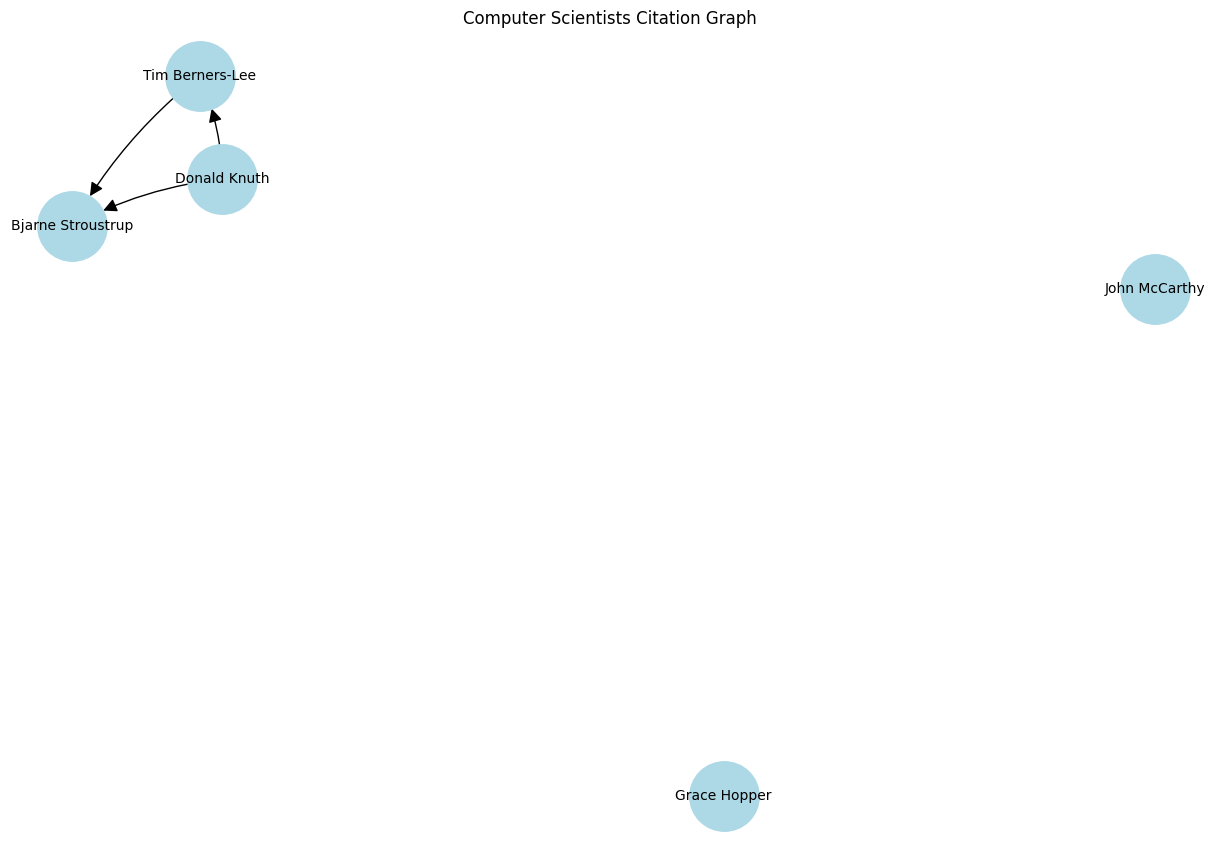

Updated rankings: [('Bjarne Stroustrup', 0.5208692975273159), ('Tim Berners-Lee', 0.28155110874039785), ('Donald Knuth', 0.19757959373228617)]

After removing Grace Hopper:


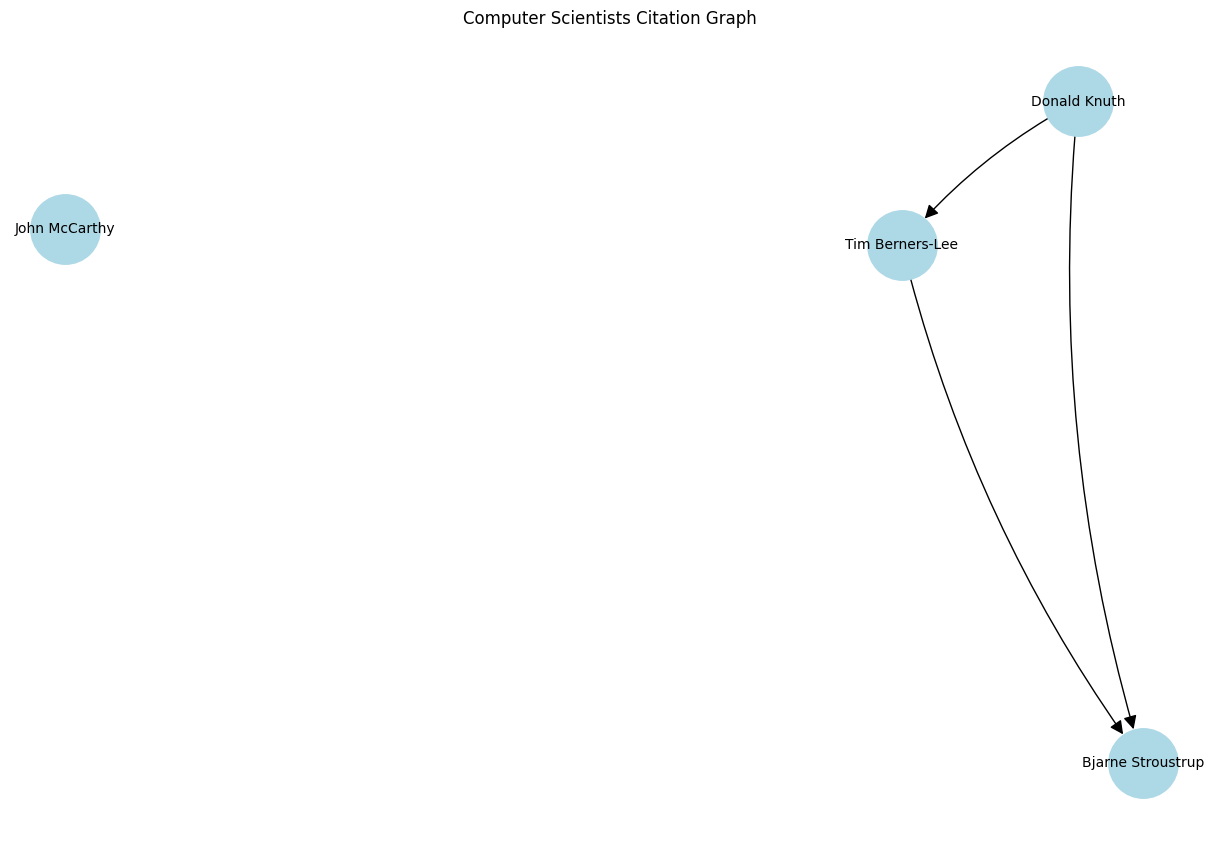

Final rankings: [('Bjarne Stroustrup', 2), ('Tim Berners-Lee', 1), ('Donald Knuth', 0)]


In [149]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Dict, Optional
from functools import lru_cache

class ScientistGraph:
    def __init__(self):
        self.scientist_list: List[ComputerScientist] = []
        self.graph: Dict[str, List[str]] = {}
        self.url_to_name: Dict[str, str] = {}
        self.scientist_dict: Dict[str, ComputerScientist] = {}

    def add_scientist(self, scientist_name: str) -> None:
        # Check if already exists
        if scientist_name in self.scientist_dict:
            print(f"{scientist_name} already in graph")
            return

        # Fetch scientist data
        scientist = fetch_scientist2(scientist_name)
        if not scientist or not hasattr(scientist, 'wikipedia_link'):
            print(f"Could not fetch {scientist_name}")
            return

        # Add to data structures
        self.scientist_list.append(scientist)
        self.scientist_dict[scientist.name] = scientist
        self.url_to_name[scientist.wikipedia_link] = scientist.name
        self.graph[scientist.name] = []

        # Find and add connections
        try:
            response = requests.get(scientist.wikipedia_link, timeout=10)
            soup = BeautifulSoup(response.text, 'html.parser')

            for link in soup.find_all('a'):
                href = link.get('href', '')
                if href.startswith('/wiki/'):
                    parsed = urlparse(href)
                    full_url = f"https://en.wikipedia.org{parsed.path}"

                    if full_url in self.url_to_name:
                        target_name = self.url_to_name[full_url]
                        if target_name != scientist.name:
                            self.graph[scientist.name].append(target_name)
        except Exception as e:
            print(f"Error processing links for {scientist_name}: {str(e)}")

    def remove_scientist(self, scientist_name: str) -> None:
        if scientist_name not in self.scientist_dict:
            print(f"{scientist_name} not in graph")
            return

        # Remove from data structures
        scientist = self.scientist_dict.pop(scientist_name)
        self.scientist_list.remove(scientist)
        del self.url_to_name[scientist.wikipedia_link]

        # Remove from graph
        del self.graph[scientist_name]

        # Remove all references
        for name in self.graph:
            if scientist_name in self.graph[name]:
                self.graph[name].remove(scientist_name)

    def plot(self) -> None:
        G = nx.DiGraph()
        G.add_nodes_from(self.scientist_dict.keys())

        for source, targets in self.graph.items():
            G.add_edges_from((source, target) for target in targets)

        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G, k=0.5, iterations=50)
        nx.draw(G, pos, with_labels=True, node_size=2500,
               node_color='lightblue', font_size=10,
               arrowsize=20, connectionstyle='arc3,rad=0.1')
        plt.title("Computer Scientists Citation Graph")
        plt.show()

    def rank_scientists(self, method: str = 'pagerank') -> List[tuple]:
        G = nx.DiGraph()
        for source, targets in self.graph.items():
            G.add_edges_from([(source, target) for target in targets])

        if method == 'pagerank':
            scores = nx.pagerank(G)
        elif method == 'in-degree':
            scores = {n: G.in_degree(n) for n in G.nodes()}
        elif method == 'out-degree':
            scores = {n: G.out_degree(n) for n in G.nodes()}
        else:
            raise ValueError("Invalid ranking method")

        return sorted(scores.items(), key=lambda x: x[1], reverse=True)

    def __str__(self) -> str:
        return f"ScientistGraph with {len(self.scientist_list)} nodes and {sum(len(v) for v in self.graph.values())} edges"

# Usage Example
if __name__ == "__main__":
    graph = ScientistGraph()

    # Add initial scientists
    for name in ["John McCarthy", "Grace Hopper", "Bjarne Stroustrup","Tim Berners-Lee"]:
        graph.add_scientist(name)

    # Show initial graph
    graph.plot()
    print("Initial rankings:", graph.rank_scientists())

    # Add another scientist
    graph.add_scientist("Donald Knuth")
    print("\nAfter adding Donald Knuth:")
    graph.plot()
    print("Updated rankings:", graph.rank_scientists())

    # Remove a scientist
    graph.remove_scientist("Grace Hopper")
    print("\nAfter removing Grace Hopper:")
    graph.plot()
    print("Final rankings:", graph.rank_scientists(method='in-degree'))